# Stock Price Prediction

Objective: We need to predict if the stock would go up or down tomorrow, based on the available data.

We need to make sure that we predict price goes up, when the price actually goes up. We need to maximise the True Positivity rate. We will achieve this by minimising the False Positive rate, that is when we predict that price goes up, but actually it goes down. This approach will help minimise the risk of investment.

Therefore, we will be using `Precision` as the metric.

Precision = (true positives) / (false postives + true positives)

## Libraries

In [17]:
import yfinance as yf # Yahoo Finance Package
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd

## Initialisations

In [5]:
msft = yf.Ticker('MSFT')
msft = msft.history(period='Max')
msft.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055654,0.063838,0.055654,0.061109,1031788800,0.0,0.0
1986-03-14,0.061109,0.064384,0.061109,0.063292,308160000,0.0,0.0
1986-03-17,0.063292,0.064929,0.063292,0.064384,133171200,0.0,0.0
1986-03-18,0.064384,0.064929,0.062201,0.062746,67766400,0.0,0.0
1986-03-19,0.062746,0.063292,0.061109,0.061655,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

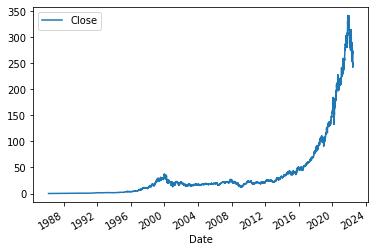

In [6]:
msft.plot.line(y='Close', use_index=True)

## Data Preprocessing

We select the target feature as following:
- We want to see pairs of consecutive rows, if the Close price of the second row is greater than that of first row, then we put Target = 1, otherwise Target = 0

In [7]:
data = msft[['Close']]
data = data.rename(columns= {'Close': 'Actual_Close'})
data['Target'] = msft.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Close']

In [8]:
data.head()

,Actual_Close,Target
Date,,
1986-03-13,0.061109,NaN
1986-03-14,0.063292,1.0
1986-03-17,0.064384,1.0
1986-03-18,0.062746,0.0
1986-03-19,0.061655,0.0


In [31]:
data['Target'].value_counts()

1.0    4621
0.0    4520
Name: Target, dtype: int64

In [9]:
msft_prev = msft.copy()
msft_prev = msft_prev.shift(1)
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.055654,0.063838,0.055654,0.061109,1.031789e+09,0.0,0.0
1986-03-17,0.061109,0.064384,0.061109,0.063292,3.081600e+08,0.0,0.0
1986-03-18,0.063292,0.064929,0.063292,0.064384,1.331712e+08,0.0,0.0
1986-03-19,0.064384,0.064929,0.062201,0.062746,6.776640e+07,0.0,0.0


In [10]:
predictors = ['Close', 'Open', 'High', 'Low', 'Volume']
data = data.join(msft_prev[predictors]).iloc[1:]
data.head()

,Actual_Close,Target,Close,Open,High,Low,Volume
Date,,,,,,,
1986-03-14,0.063292,1.0,0.061109,0.055654,0.063838,0.055654,1.031789e+09
1986-03-17,0.064384,1.0,0.063292,0.061109,0.064384,0.061109,3.081600e+08
1986-03-18,0.062746,0.0,0.064384,0.063292,0.064929,0.063292,1.331712e+08
1986-03-19,0.061655,0.0,0.062746,0.064384,0.064929,0.062201,6.776640e+07
1986-03-20,0.060018,0.0,0.061655,0.062746,0.063292,0.061109,4.789440e+07


## Model Initialisation

In [12]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split=200, random_state=1)

In [13]:
train = data.iloc[:-100]
test =  data.iloc[-100:]

In [14]:
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=200, random_state=1)

## Prediction

In [16]:
preds = model.predict(test[predictors])
preds

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [18]:
preds = pd.Series(preds, index=test.index)
preds

Date
2022-01-26    0.0
2022-01-27    0.0
2022-01-28    1.0
2022-01-31    1.0
2022-02-01    1.0
             ... 
2022-06-13    1.0
2022-06-14    0.0
2022-06-15    1.0
2022-06-16    1.0
2022-06-17    1.0
Length: 100, dtype: float64

In [19]:
precision_score(test['Target'], preds)

0.45054945054945056

In [20]:
combined = pd.concat({'Target': test['Target'], 'Predictions': preds}, axis=1)
combined

,Target,Predictions
Date,,
2022-01-26,1.0,0.0
2022-01-27,1.0,0.0
2022-01-28,1.0,1.0
2022-01-31,1.0,1.0
2022-02-01,0.0,1.0
...,...,...
2022-06-13,0.0,1.0
2022-06-14,1.0,0.0
2022-06-15,1.0,1.0


<AxesSubplot:xlabel='Date'>

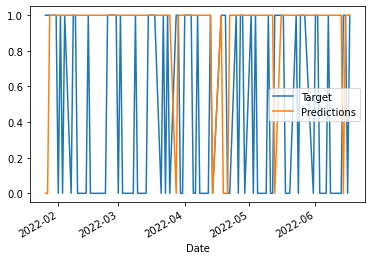

In [21]:
combined.plot()

## Backtesting Enginer

- Robust Error Metrics

In [36]:
start = 1000
step = 750

In [47]:
def backtest(data, model, predictors, start = 1000, step = 750):
    predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()

        model.fit(train[predictors], train['Target'])

        preds = model.predict_proba(test[predictors])[:,1]
        preds[preds > .6] = 1
        preds[preds <= .6] = 0

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat({'Target': test['Target'], 'Predictions': preds}, axis=1)

        predictions.append(combined)

    predictions = pd.concat(predictions)
    return predictions

In [38]:
predictions['Predictions'].value_counts()

0.0    7412
1.0     729
Name: Predictions, dtype: int64

In [39]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5006858710562414

## Improving the Model Accuracy

In [41]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

weekly_trend = data.shift(1).rolling(7).mean()['Target']

In [42]:
data['weekly_mean'] = weekly_mean['Close'] / data['Close']
data['quarterly_mean'] = quarterly_mean['Close'] / data['Close']
data['annual_mean'] = annual_mean['Close'] / data['Close']

data['annual_weekly_mean'] = data['annual_mean'] / data['weekly_mean']
data['annual_quarterly_mean'] = data['annual_mean'] / data['weekly_mean']
data['weekly_trend'] = weekly_trend

data['open_close_ratio'] = data['Open'] / data['Close']
data['high_close_ratio'] = data['High'] / data['Close']
data['low_close_ratio'] = data['Low'] / data['Close']

In [44]:
full_predictors = predictors + ['weekly_mean', 'quarterly_mean', 'annual_mean', 'annual_weekly_mean', 'annual_quarterly_mean', 'weekly_trend', 'open_close_ratio', 'high_close_ratio', 'low_close_ratio']

In [48]:
predictions = backtest(data.iloc[365:], model, full_predictors)

In [49]:
precision_score(predictions['Target'], predictions['Predictions'])

0.6022099447513812

In [50]:
predictions['Predictions'].value_counts()

0.0    7595
1.0     181
Name: Predictions, dtype: int64

<AxesSubplot:xlabel='Date'>

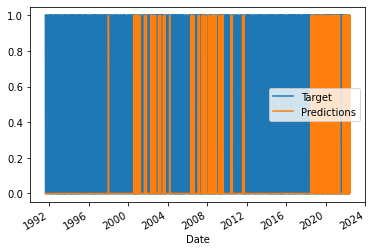

In [51]:
predictions.plot()

# Next Steps

1. Calculate how much money you will make using this algorithm
2. Reduce the backtest step to 50. Highest accuracy when step =1
3. Try different algorithm
4. Add other predictors
5. If the target was not balanced --> use weighted classes etc